# LOGISTIC REGRESSION

The logistic regression is a linear model used to predecit the result in which any variable is a specific category

I am going to create a dataset where there are two different categories and then I am going to apply the model.

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn import model_selection, metrics
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

Text(0, 0.5, 'Category')

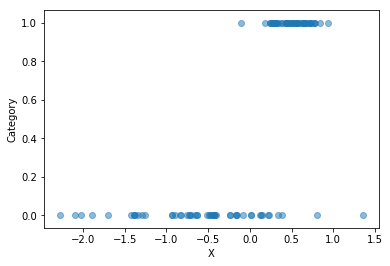

In [2]:
x, y = make_classification(n_features=1, n_informative=1, n_redundant=0, n_clusters_per_class=1, class_sep=0.5)
plt.scatter(x, y, alpha=0.5)
plt.xlabel('X')
plt.ylabel('Category')

In [3]:
logreg = LogisticRegression()
logreg.fit(x, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Text(0, 0.5, 'Cat-Prob')

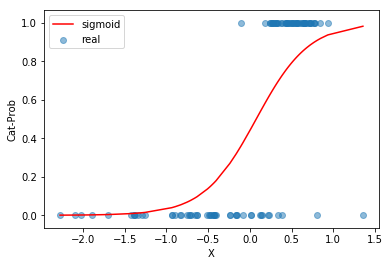

In [4]:
plt.scatter(x, y, alpha=0.5, label='real')
x_sort = np.sort(x, axis=0)
plt.plot(x_sort, logreg.predict_proba(x_sort)[:, 1], color='r', label='sigmoid')
plt.legend(loc=2)
plt.xlabel('X')
plt.ylabel('Cat-Prob')

Method 'predict_proba' gives the probability of membership to a category

In [5]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.3)
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
print('Accuracy: %0.2f' % metrics.accuracy_score(y_test, y_pred))
print('Precision: %0.2f' % metrics.precision_score(y_test, y_pred, average='macro'))

Accuracy: 0.90
Precision: 0.90


Method 'predict' give the category of a variable

### Graph

In this section I am going to implement a graph about any logitic regression to see how it works

In [6]:
x = np.array([[4, 7], [3.5, 8], [3.1, 6.2], [0.5, 1], [1, 2], [1.2, 1.9], [6, 2], [5.7, 1.5], [5.4, 2.2]])
y = np.array([0, 0, 0, 1, 1, 1, 2, 2, 2])

In [7]:
log_reg = LogisticRegression(solver='liblinear', C=1000)
log_reg.fit(x, y)

LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

Plot the mesh

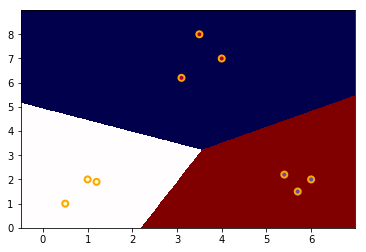

In [8]:
x_min, x_max = min(x[:, 0]) - 1, max(x[:, 0]) + 1
y_min, y_max = min(x[:, 1]) - 1, max(x[:, 1]) + 1

step_size = 0.01
x_mesh = np.arange(x_min, x_max, step_size)
y_mesh = np.arange(y_min, y_max, step_size)

x_val, y_val = np.meshgrid(x_mesh, y_mesh)

output = log_reg.predict(np.c_[x_val.ravel(), y_val.ravel()])
output = output.reshape(x_val.shape)

plt.figure()

plt.pcolormesh(x_val, y_val, output, cmap='seismic')

plt.scatter(x[:, 0], x[:, 1], c=y, edgecolors='orange', linewidth=2, cmap='Spectral')

plt.xlim(x_val.min(), x_val.max())
plt.ylim(y_val.min(), y_val.max())

plt.xticks((np.arange(int(min(x[:, 0])-1), int(max(x[:, 0])+1), 1.0)))
plt.yticks((np.arange(int(min(x[:, 1])-1), int(max(x[:, 1])+1), 1.0)))

plt.show()

In the previouse image we can see three category about data and the limits of these categories becase I have predicted values of the mesh.